In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [1]:
path = 'C:/Users/Hp/Desktop/Spark Innovation/Jupyter/'

In [114]:
# Set an appropriate chunk size based on your system's memory
chunk_size = 10000

# Initialize an empty list to store chunks
chunks = []

# Specify the path to your CSV file
path = 'C:/Users/Hp/Downloads/'

# Iterate through chunks and append to the list
for chunk in pd.read_csv(path + 'output_file_review.csv', chunksize=chunk_size):
    chunks.append(chunk)

# Concatenate the chunks into a single DataFrame
csv_reader = pd.concat(chunks, ignore_index=True)


In [115]:
csv_reader.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [116]:
csv_reader.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   review_id    object
 1   user_id      object
 2   business_id  object
 3   stars        int64 
 4   useful       int64 
 5   funny        int64 
 6   cool         int64 
 7   text         object
 8   date         object
dtypes: int64(4), object(5)
memory usage: 480.0+ MB


In [117]:
# Assuming 'csv_reader' is your DataFrame
object_description = csv_reader.describe(include=['O'])  # 'O' stands for object data type

# Display the descriptive statistics for object columns
print(object_description)

                     review_id                 user_id  \
count                  6990280                 6990280   
unique                 6990280                 1987929   
top     KU_O5udG6zpxOg-VcAEodg  _BcWyKQL16ndpBdggh2kNA   
freq                         1                    3048   

                   business_id  \
count                  6990280   
unique                  150346   
top     _ab50qdWOk0DdB6XOrBitw   
freq                      7673   

                                                     text                 date  
count                                             6990280              6990280  
unique                                            6974127              6885665  
top     DO NOT PARK HERE!\nthey are too quick to boot ...  2014-04-14 09:19:21  
freq                                                   18                    8  


In [118]:
unique_values = csv_reader['review_id'].unique()
unique_values_count = len(unique_values)

print("Unique values in 'review_id' column:", unique_values)
print("Number of unique values:", unique_values_count)

Unique values in 'review_id' column: ['KU_O5udG6zpxOg-VcAEodg' 'BiTunyQ73aT9WBnpR9DZGw'
 'saUsX_uimxRlCVr67Z4Jig' ... 'YNfNhgZlaaCO5Q_YJR4rEw'
 'i-I4ZOhoX70Nw5H0FwrQUA' 'RwcKOdEuLRHNJe4M9-qpqg']
Number of unique values: 6990280


In [119]:
unique_values = csv_reader['business_id'].unique()
unique_values_count = len(unique_values)

print("Unique values in 'business_id' column:", unique_values)
print("Number of unique values:", unique_values_count)

Unique values in 'business_id' column: ['XQfwVwDr-v0ZS3_CbbE5Xw' '7ATYjTIgM3jUlt4UM3IypQ'
 'YjUWPpI6HXG530lwP-fb2A' ... 'Tj9FmBCHd84kjAE9vcoBnw'
 'umg_M7rIoVccsxqoWAF3BA' 'vI4vyi1dfG93oAiSRFDymA']
Number of unique values: 150346


In [19]:
unique_values = csv_reader['user_id'].unique()
unique_values_count = len(unique_values)

print("Unique values in 'user_id' column:", unique_values)
print("Number of unique values:", unique_values_count)

Unique values in 'user_id' column: ['mh_-eMZ6K5RLWhZyISBhwA' 'OyoGAe7OKpv6SyGZT5g77Q'
 '8g_iMtfSiwikVnbP2etR0A' ... '-AkziDwQ8hv2COTDBBUpig'
 's67G457QlHSvk5RjOMN91w' '_XVdmFWSgTN6YlojUxixTA']
Number of unique values: 1987929


In [120]:
csv_reader = csv_reader.dropna()

In [121]:
import re

def clean_text(text):
    # Remove non-alphanumeric characters using regular expressions
    clean_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return clean_text
    #covert to lowercase
    text = text.lower()
csv_reader['text'][0], clean_text(csv_reader['text'][0])

("If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. \n\nThe food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker.",
 'If you decide to eat here just be aware it is going to take about 2 hours from beginning to end We have tried it multiple times because I want to like it I have been to its other locations in NJ and never had a bad experience \n\nThe food is good but it takes a very long time to come out The waitstaff is very young but usually pleasant We have just had too many experiences where we spent way too long waiting We usually opt for another diner or restaurant on the weekends in 

In [122]:
csv_reader['text'].head().apply(clean_text)

0    If you decide to eat here just be aware it is ...
1    Ive taken a lot of spin classes over the years...
2    Family diner Had the buffet Eclectic assortmen...
3    Wow  Yummy different  delicious   Our favorite...
4    Cute interior and owner  gave us tour of upcom...
Name: text, dtype: object

In [123]:
pip install wordcloud matplotlib numpy

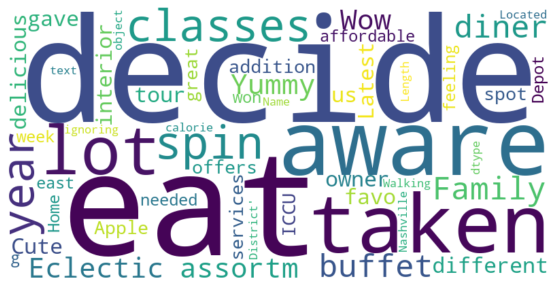

In [124]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Sample text data (replace this with your Yelp dataset text)
text_data = csv_reader['text']
text_data = str(text_data)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis labels
plt.show()


In [125]:
def preprocess(text):
  return' '.join([word for word in word_tokenize(text) if word not in stopwords.words('english') and not word.isdigit() and word not in string.punctuation])

In [126]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [127]:
import nltk
from nltk.tokenize import word_tokenize
def clean_text(text):
  csv_reader['tokens'] = csv_reader['clean_text'].apply(word_tokenize)

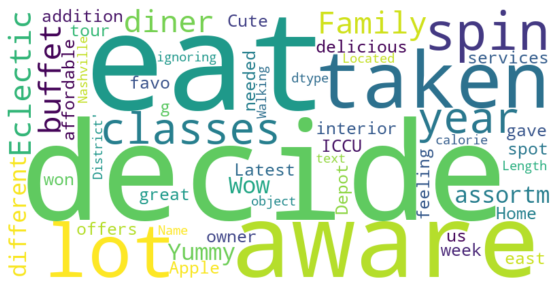

In [128]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Sample text data (replace this with your Yelp dataset text)
text_data = csv_reader['text']
text_data = str(text_data)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis labels
plt.show()

In [129]:
def preprocess(text):
  return ' '.join([word for word in word_tokenize(text) if word not in stopwords.words('english') and not word.isdigit() and word not in string.punctuation])

In [130]:
pip install swifter

  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16532 sha256=f9bdfe3a2c47f08be77762865cbc87b21683c487cb8b92ae41f2bee670b2d72a
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\7b\4a\7e\bcc48cf10e10fcf5b4dae464a66b523756db6b950e02129680
Successfully built swifter
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.8.1
    Uninstalling importlib-metadata-4.8.1:
      Successfully uninstalled importlib-metadata-4.8.1
Note: you may need to restart the kernel to use updated packages.


In [131]:
pip install spacy

  Using cached colorama-0.4.6-py2.py3-none-any.whl (25 kB)
  Attempting uninstall: colorama
    Found existing installation: colorama 0.4.4
    Uninstalling colorama-0.4.4:
      Successfully uninstalled colorama-0.4.4
Note: you may need to restart the kernel to use updated packages.


In [3]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import nltk
import swifter
import spacy
import pandas as pd

In [134]:
# Download spaCy model
spacy.cli.download("en_core_web_sm")

# Download NLTK resources (if not already downloaded)
nltk.download('stopwords')
nltk.download('punkt')

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [135]:
# Assuming csv_reader is your DataFrame
def preprocess(text):
    stop_words = set(stopwords.words('english'))
    return ' '.join([word for word in word_tokenize(text) if word not in stop_words and not word.isdigit() and word not in string.punctuation])

# Load the downloaded model
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

def preprocess_spacy(text):
    if pd.isnull(text):
        return ''
    stop_words = set(stopwords.words('english'))  # Define stop_words here
    doc = nlp(text)
    return ' '.join([token.text for token in doc if token.text.lower() not in stop_words and not token.text.isdigit() and token.text.lower() not in string.punctuation])

# Assuming df is your DataFrame
csv_reader['cleaned_text'] = csv_reader['text'].swifter.apply(preprocess_spacy)

Pandas Apply: 100%|███████████████████████████████████████████████████████| 6990280/6990280 [26:00:43<00:00, 74.65it/s]


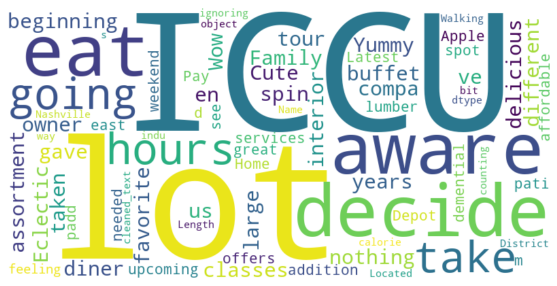

In [136]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Sample text data (replace this with your Yelp dataset text)
text_data = csv_reader['cleaned_text']
text_data = str(text_data)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis labels
plt.show()

In [137]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
def preprocess_with_stemming(text):
    stop_words = set(stopwords.words('english'))
    porter_stemmer = PorterStemmer()
    return ' '.join([porter_stemmer.stem(word) for word in word_tokenize(text) if word not in stop_words and not word.isdigit() and word not in string.punctuation])

# Example usage
csv_reader['cleaned_text_stemmed'] = csv_reader['text'].apply(preprocess_with_stemming)


In [143]:
csv_reader.to_csv('Main_Project.csv', index=False)
Main_Project_path = 'C:/Users/Hp/Desktop/Spark Innovation/Jupyter/Main_Project.csv'
csv_reader.to_csv(Main_Project_path, index=False)
print(f"Main_Project saved to {Main_Project_path}")

Main_Project saved to C:/Users/Hp/Desktop/Spark Innovation/Jupyter/Main_Project.csv


In [5]:
pip install scikit-learn

In [6]:

from sklearn.feature_extraction.text import TfidfVectorizer

# Sample list of text documents
text=['text']
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(text)

In [7]:
pip install pyspellchecker

Note: you may need to restart the kernel to use updated packages.


In [8]:
# Specify the full path to your preprocessed dataset
file_path = 'C:/Users/Hp/Desktop/Spark Innovation/Jupyter/Main_Project.csv'

# Load the preprocessed dataset
df_review = pd.read_csv(file_path)

# Display basic information about the dataset
print(df_review.info())

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [18]:
from sklearn.model_selection import train_test_split

# Assuming you have a column named 'cleaned_text_stemmed'
X = df_review['text']

# Assuming 'is_fake' is your target variable
y = df_review['is_fake']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


KeyError: 'is_fake'

In [3]:
import pandas as pd

# Step 1: Load the preprocessed dataset
df_review = pd.read_csv('C:/Users/Hp/Desktop/Spark Innovation/Jupyter/Main_Project.csv')
# file_path = 'C:/Users/Hp/Desktop/Spark Innovation/Jupyter/Main_Project.csv'

# Display basic information about the dataset
print(df_review.info())

# Step 2: Feature Engineering

# Criteria 1: Unusual language patterns (Example: Count of uppercase words)
df_review['uppercase_word_count'] = df_review['text'].apply(lambda x: sum(1 for word in x.split() if word.isupper()))

# Criteria 2: Abnormal review length
df_review['review_length'] = df_review['text'].apply(len)

# Display the updated DataFrame
print(df_review.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 11 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   review_id             object
 1   user_id               object
 2   business_id           object
 3   stars                 int64 
 4   useful                int64 
 5   funny                 int64 
 6   cool                  int64 
 7   text                  object
 8   date                  object
 9   cleaned_text          object
 10  cleaned_text_stemmed  object
dtypes: int64(4), object(7)
memory usage: 586.6+ MB
None
                review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  

In [4]:

# Step 1: Feature Engineering

# Criteria 1: Unusual language patterns (Example: Count of uppercase words)
df_review['uppercase_word_count'] = df_review['text'].apply(lambda x: sum(1 for word in x.split() if word.isupper()))

# Criteria 2: Abnormal review length
df_review['review_length'] = df_review['text'].apply(len)

# Criteria 3: Suspicious timing or posting frequency (Assuming you have a 'timestamp' column)
df_review['date'] = pd.to_datetime(df_review['date'])
df_review['hour_of_day'] = df_review['date'].dt.hour

# Criteria 4: Lack of details or specific information (Example: Count of numeric characters)
df_review['numeric_char_count'] = df_review['text'].apply(lambda x: sum(1 for char in x if char.isdigit()))

# Step 2: Explore the Features

# Explore the new features
print(df_review[['uppercase_word_count', 'review_length', 'hour_of_day', 'numeric_char_count']])

# Step 3: Visualize the Features (Optional)

# You can use various visualization libraries (e.g., seaborn, matplotlib) to explore the distribution of features.

# Step 4: Analyze and Define Criteria

# Based on the exploration, analyze the features and define criteria for identifying fake reviews.
# For example, you might consider reviews with an unusually high count of uppercase words as suspicious.

# Step 5: Apply the Criteria

# Create a new column 'predicted_label' based on the defined criteria
df_review['predicted_label'] = 0  # Initialize as 0
# Apply criteria (Example: If uppercase_word_count > threshold, mark as fake)
df_review.loc[df_review['uppercase_word_count'] > 5, 'predicted_label'] = 1  # Adjust the threshold as needed

# Evaluate the results
print(df_review[['text', 'predicted_label']])


         uppercase_word_count  review_length  hour_of_day  numeric_char_count
0                           3            513           22                   1
1                           1            829           15                   0
2                           0            339           20                   0
3                           0            243            0                   2
4                           2            534           20                   0
...                       ...            ...          ...                 ...
6990275                     3            322           21                   6
6990276                     1            397           16                   1
6990277                     3            467            3                   2
6990278                     9           2317           18                   0
6990279                     9           1198           22                   0

[6990280 rows x 4 columns]
                                    

In [5]:
# Assuming you have a DataFrame named df_review with a 'predicted_label' column

# Create separate DataFrames for each label
df_genuine = df_review[df_review['predicted_label'] == 0]
df_fake = df_review[df_review['predicted_label'] == 1]

# Save each DataFrame to a CSV file
df_genuine.to_csv('True.csv', index=False)
df_fake.to_csv('Fake.csv', index=False)

In [13]:
import pandas as pd

# Read the CSV files into DataFrames
df_genuine = pd.read_csv('True.csv')
df_fake = pd.read_csv('Fake.csv')

# Display basic information about the DataFrames
print("Genuine Reviews:")
print(df_genuine.info())


print("\nFake Reviews:")
print(df_fake.info())


Genuine Reviews:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634073 entries, 0 to 5634072
Data columns (total 16 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   review_id             object
 1   user_id               object
 2   business_id           object
 3   stars                 int64 
 4   useful                int64 
 5   funny                 int64 
 6   cool                  int64 
 7   text                  object
 8   date                  object
 9   cleaned_text          object
 10  cleaned_text_stemmed  object
 11  uppercase_word_count  int64 
 12  review_length         int64 
 13  hour_of_day           int64 
 14  numeric_char_count    int64 
 15  predicted_label       int64 
dtypes: int64(9), object(7)
memory usage: 687.8+ MB
None

Fake Reviews:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356207 entries, 0 to 1356206
Data columns (total 16 columns):
 #   Column                Non-Null Count    Dtype 
---  ------          

In [14]:
# Save the DataFrames to CSV files
True_csv_path = 'C:/Users/Hp/Desktop/Spark Innovation/Jupyter/True.csv'
Fake_csv_path = 'C:/Users/Hp/Desktop/Spark Innovation/Jupyter/Fake.csv'

df_genuine.to_csv(True_csv_path, index=False)
df_fake.to_csv(Fake_csv_path, index=False)

print(f"Genuine Reviews saved to {True_csv_path}")
print(f"Fake Reviews saved to {Fake_csv_path}")

Genuine Reviews saved to C:/Users/Hp/Desktop/Spark Innovation/Jupyter/True.csv
Fake Reviews saved to C:/Users/Hp/Desktop/Spark Innovation/Jupyter/Fake.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [3]:
path = 'C:/Users/Hp/Desktop/Spark Innovation/Jupyter/'

In [4]:
data_fake = pd.read_csv(path + 'Fake.csv')
data_true = pd.read_csv(path + 'True.csv')

In [5]:
data_fake.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,cleaned_text,cleaned_text_stemmed,uppercase_word_count,review_length,hour_of_day,numeric_char_count,predicted_label
0,lUUhg8ltDsUZ9h0xnwY4Dg,RreNy--tOmXMl1en0wiBOg,cPepkJeRMtHapc_b2Oe_dw,4,1,0,1,I was really between 3 and 4 stars for this on...,2018-07-17 03:30:07,really stars one LOVE 96th street Naked Tchops...,i realli star one i love 96th street nake tcho...,13,1555,3,8,1
1,p198qZsKOMCUhgdtRWsOKQ,3MpDvy5gEdsbZh9-p92dHg,8QnuWGVNBhzyYXGSeRdi4g,4,0,0,0,After my ROTD yesterday of a different Sweet ...,2013-10-24 19:24:33,ROTD yesterday different Sweet CeCe 's locat...,after rotd yesterday differ sweet cece 's loca...,7,490,19,2,1
2,YcLXh-3UC9y6YFAI9xxzPQ,G0DHgkSsDozqUPWtlxVEMw,oBhJuukGRqPVvYBfTkhuZA,4,0,0,0,The only reason I didn't give this restaurant ...,2015-03-05 03:37:54,reason n't give restaurant star rating one sin...,the reason i n't give restaur star rate one si...,8,2343,3,10,1
3,cvQXRFLCyr0S7EgFb4lZqw,ZGjgfSvjQK886kiTzLwfLQ,EtKSTHV5Qx_Q7Aur9o4kQQ,5,3,1,1,"On a scale of one to things that are awesome, ...",2009-10-14 01:15:04,scale one things awesome place bomb \n\n drawn...,on scale one thing awesom place bomb i drawn p...,7,934,1,5,1
4,cejwyz1Hn1yQ-v2m9PAovQ,9ZLpaBGl-udvS-niR3Y_ow,GILL0ZkvVXJaNQzYRXfMQw,5,1,1,0,I absolutely love Courtney! She is hands down ...,2012-10-08 19:32:44,absolutely love Courtney hands best hairstylis...,i absolut love courtney she hand best hairstyl...,6,611,19,0,1


In [6]:
data_true.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,cleaned_text,cleaned_text_stemmed,uppercase_word_count,review_length,hour_of_day,numeric_char_count,predicted_label
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,decide eat aware going take hours beginning en...,if decid eat awar go take hour begin end we tr...,3,513,22,1,0
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,'ve taken lot spin classes years nothing compa...,i 've taken lot spin class year noth compar cl...,1,829,15,0,0
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,Family diner buffet Eclectic assortment large ...,famili diner had buffet eclect assort larg chi...,0,339,20,0,0
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,Wow Yummy different delicious favorite ...,wow yummi differ delici our favorit lamb curri...,0,243,0,2,0
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,Cute interior owner gave us tour upcoming pati...,cute interior owner gave us tour upcom patio/r...,2,534,20,0,0


In [7]:
data_fake["class"] = 0
data_true["class"] = 1

In [8]:
data_fake.shape, data_true.shape

((1356207, 17), (5634073, 17))

In [9]:
data_fake_manual_testing = data_fake.tail(10)
for i in range(1356206, 1356196, -1):
    data_fake.drop([i], axis = 0, inplace = True) 


data_true_manual_testing = data_true.tail(10)
for i in range(5634072, 5634062, -1):
    data_true.drop([i], axis = 0, inplace = True)

In [10]:
data_fake.shape, data_true.shape

((1356197, 17), (5634063, 17))

In [27]:
data_fake_manual_testing['class'] = 0
data_true_manual_testing['class'] = 1

C:\Users\Hp\AppData\Local\Temp/ipykernel_19704/277247672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake_manual_testing['class'] = 0
C:\Users\Hp\AppData\Local\Temp/ipykernel_19704/277247672.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_true_manual_testing['class'] = 1


In [28]:
data_fake_manual_testing.head(10)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,cleaned_text,cleaned_text_stemmed,uppercase_word_count,review_length,hour_of_day,numeric_char_count,predicted_label,class
1356197,X5R98ygOtbhryDiKA-J2qQ,LHWtjTG7e1NzNPYUbUo-9w,rgeuy1qbw6Z8B6CSVANHIA,5,1,1,1,I've been to the other Federal Donuts location...,2012-10-13 14:39:37,'ve Federal Donuts location multiple times lov...,i 've feder donut locat multipl time i love do...,9,752,14,0,1,0
1356198,MVg4YUQeEhCA7Z7RsBJSVg,7-7A0Avj47slLGV7yBFc8w,ytynqOUb3hjKeJfRj5Tshw,3,1,0,0,"I was so excited about all the food I saw, but...",2013-07-25 21:00:15,excited food saw unfortunately place CLOSES EA...,i excit food i saw unfortun place close so ear...,8,262,21,2,1,0
1356199,cOaCw12O2B3ER_Ir73w_bA,99_EbpwCcCRAa66YgorrKA,3MZ6DYP7EANJmP4UOW3PAw,1,0,0,0,The worst. Wish I had read all the other revie...,2016-04-27 04:14:52,worst Wish read reviews went Car came dirty ...,the worst wish i read review i went car came d...,6,672,4,0,1,0
1356200,99ylx-qPUSseITqBye2MpA,-AkziDwQ8hv2COTDBBUpig,aunmz06iWvo3bd6MMHEbqg,3,0,0,0,Philly has become a dangerous place with the m...,2022-01-18 03:48:44,Philly become dangerous place murders per capi...,philli becom danger place murder per capita bi...,9,1433,3,17,1,0
1356201,hCTngjYV495w9M-9sIOvXA,O5y7KlfBdqV6Ih8yhjZLsg,Oisn1dreLP_Ju344qlpWcQ,5,2,0,1,So I've belonged to a gym for YEARS and I fina...,2012-02-17 14:57:26,'ve belonged gym YEARS finallly learned someth...,so i 've belong gym year i finallli learn some...,10,742,14,3,1,0
1356202,cACxcUY_AIsQKkpDRXuqnw,MCzlzlOw7IGbRAKVjJBPtg,fcGexL5VH5G2Xw0tRj9uOQ,3,1,1,0,This is a good pizza option - they deliver thr...,2018-03-13 13:54:48,good pizza option deliver GrubHub services u...,thi good pizza option deliv grubhub servic i u...,6,791,13,1,1,0
1356203,7NgXAuTFiJHYbuepOPwU0w,x1QLCwZGFAjxRRw4EHc3-g,1_BVWDzi5cVqWxNe9bOMMQ,5,1,0,1,Don't misinterpret my 5-star review....I don't...,2016-04-30 01:02:34,n't misinterpret star review .... n't think We...,do n't misinterpret 5-star review .... i n't t...,11,890,1,5,1,0
1356204,YVX1Wsa4LYxjvFwuHBb_gA,RKPkxOYQlM0BjhM-H6_vAw,X4mouE_cMiwbfyCPZ_K-FA,4,3,0,2,"Good, maybe very good. I went for lunch, so t...",2015-01-23 23:52:03,Good maybe good went lunch head chef n't rev...,good mayb good i went lunch head chef n't revi...,16,2700,23,3,1,0
1356205,i-I4ZOhoX70Nw5H0FwrQUA,YwAMC-jvZ1fvEUum6QkEkw,Rr9kKArrMhSLVE9a53q-aA,5,1,0,0,For when I'm feeling like ignoring my calorie-...,2022-01-19 18:59:27,'m feeling like ignoring calorie counting indu...,for i 'm feel like ignor calorie-count indulg ...,9,2317,18,0,1,0
1356206,RwcKOdEuLRHNJe4M9-qpqg,6JehEvdoCvZPJ_XIxnzIIw,VAeEXLbEcI9Emt9KGYq9aA,3,10,3,7,Located in the 'Walking District' in Nashville...,2018-01-02 22:50:47,Located Walking District Nashville 's bit way ...,locat 'walk district nashvil 's bit way us mis...,9,1198,22,0,1,0


In [29]:
data_true_manual_testing.head(10)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,cleaned_text,cleaned_text_stemmed,uppercase_word_count,review_length,hour_of_day,numeric_char_count,predicted_label,class
5634063,KlHxcAifUF5zDKpJCBrRsw,7ziWZULyiZv2TesYNMFf4g,qQO7ErS_RAN4Vs1uX0L55Q,4,1,0,0,"ice cream! ice cream sodas, sundaes!! \n\nwant...",2012-10-21 04:08:40,ice cream ice cream sodas sundaes \n\n wanted ...,ice cream ice cream soda sunda want share sund...,2,528,4,1,0,1
5634064,PVRvzY0NxSU-fiK3JOXX7w,cTozFTTWjlFYc3yusdbZmA,uMVOtr16r1ELu46pWr4HCQ,1,0,0,0,Just average Thai food tonight. Bangkok has al...,2022-01-18 06:42:59,average Thai food tonight Bangkok always go Th...,just averag thai food tonight bangkok alway go...,2,865,6,14,0,1
5634065,E5sXn_qdPX5qRxUEApmiuA,Mc4C7fVY0sEcD-U5eOA2Og,ZNfph3_VzRLTOemk9Tmzaw,3,5,0,1,This gym gets the job done. \n\nUpsides: \nChi...,2016-01-25 21:45:34,gym gets job done \n\n Upsides \n Childcare in...,thi gym get job done upsid childcar includ mem...,1,1037,21,4,0,1
5634066,MIXdpbbCTRAVdi8RiMjwdg,s67G457QlHSvk5RjOMN91w,58MJvmfo5hyfBbvkr54sFA,5,1,0,0,Great gym. Was in Indy for 4 days on business...,2022-01-18 15:24:44,Great gym Indy days business local hotel gym...,great gym wa indi day busi local hotel gym mee...,4,388,15,2,0,1
5634067,Sm8-QDsuQfik-QuhRYT5bw,QIXYkyAbTvgePUOH0-cRFg,Bh4b8wJRR_ggH7JvpCO7CQ,2,0,0,0,The front desk staff is very good and they hav...,2008-09-23 02:52:37,front desk staff good couple quality trainers ...,the front desk staff good coupl qualiti traine...,3,451,2,0,0,1
5634068,wD5ZWao_vjyT2h4xmGam8Q,7L7GL5Pi2cf8mbm2Dpw4zw,e_E-jq9mwm7wk75k7Yi-Xw,5,1,0,1,It is very rare for a restaurant to be this go...,2022-01-17 22:36:01,rare restaurant good categories food ambience ...,it rare restaur good categori food ambienc ser...,0,336,22,0,0,1
5634069,zHZ-A1qyKDEgyZMDaD--wg,_XVdmFWSgTN6YlojUxixTA,6WaI-IN8ql0xpEKlb4q8tg,5,1,0,0,We redesigned my moms dress and mad it complet...,2022-01-17 20:59:01,redesigned moms dress mad completely modern 's...,we redesign mom dress mad complet modern she '...,0,209,20,0,0,1
5634070,H0RIamZu0B0Ei0P4aeh3sQ,qskILQ3k0I_qcCMI-k6_QQ,jals67o91gcrD4DC81Vk6w,5,1,2,1,Latest addition to services from ICCU is Apple...,2014-12-17 21:45:20,Latest addition services ICCU Apple Pay ICCU d...,latest addit servic iccu appl pay iccu debit c...,3,322,21,6,0,1
5634071,shTPgbgdwTHSuU67mGCmZQ,Zo0th2m8Ez4gLSbHftiQvg,2vLksaMmSEcGbjI5gywpZA,5,2,1,2,"This spot offers a great, affordable east week...",2021-03-31 16:55:10,spot offers great affordable east weekend padd...,thi spot offer great afford east weekend paddl...,1,397,16,1,0,1
5634072,YNfNhgZlaaCO5Q_YJR4rEw,mm6E4FbCMwJmb7kPDZ5v2Q,R1khUUxidqfaJmcpmGd4aw,4,1,0,0,This Home Depot won me over when I needed to g...,2019-12-30 03:56:30,Home Depot needed get lot demential lumber see...,thi home depot i need get lot dementi lumber i...,3,467,3,2,0,1


In [30]:
data_merge = pd.concat([data_fake, data_true], axis = 0)
data_merge.head(10)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,cleaned_text,cleaned_text_stemmed,uppercase_word_count,review_length,hour_of_day,numeric_char_count,predicted_label,class
0,lUUhg8ltDsUZ9h0xnwY4Dg,RreNy--tOmXMl1en0wiBOg,cPepkJeRMtHapc_b2Oe_dw,4,1,0,1,I was really between 3 and 4 stars for this on...,2018-07-17 03:30:07,really stars one LOVE 96th street Naked Tchops...,i realli star one i love 96th street nake tcho...,13,1555,3,8,1,0
1,p198qZsKOMCUhgdtRWsOKQ,3MpDvy5gEdsbZh9-p92dHg,8QnuWGVNBhzyYXGSeRdi4g,4,0,0,0,After my ROTD yesterday of a different Sweet ...,2013-10-24 19:24:33,ROTD yesterday different Sweet CeCe 's locat...,after rotd yesterday differ sweet cece 's loca...,7,490,19,2,1,0
2,YcLXh-3UC9y6YFAI9xxzPQ,G0DHgkSsDozqUPWtlxVEMw,oBhJuukGRqPVvYBfTkhuZA,4,0,0,0,The only reason I didn't give this restaurant ...,2015-03-05 03:37:54,reason n't give restaurant star rating one sin...,the reason i n't give restaur star rate one si...,8,2343,3,10,1,0
3,cvQXRFLCyr0S7EgFb4lZqw,ZGjgfSvjQK886kiTzLwfLQ,EtKSTHV5Qx_Q7Aur9o4kQQ,5,3,1,1,"On a scale of one to things that are awesome, ...",2009-10-14 01:15:04,scale one things awesome place bomb \n\n drawn...,on scale one thing awesom place bomb i drawn p...,7,934,1,5,1,0
4,cejwyz1Hn1yQ-v2m9PAovQ,9ZLpaBGl-udvS-niR3Y_ow,GILL0ZkvVXJaNQzYRXfMQw,5,1,1,0,I absolutely love Courtney! She is hands down ...,2012-10-08 19:32:44,absolutely love Courtney hands best hairstylis...,i absolut love courtney she hand best hairstyl...,6,611,19,0,1,0
5,4zopEEPqfwm-c_FNpeHZYw,JYYYKt6TdVA4ng9lLcXt_g,SZU9c8V2GuREDN5KgyHFJw,5,0,0,0,We were a bit weary about trying the Shellfish...,2016-05-31 02:14:54,bit weary trying Shellfish Company Wharf often...,we bit weari tri shellfish compani wharf often...,6,1770,2,5,1,0
6,-7LkjSPzfVgnVpuVuRuOow,uAu772KpSkb-tPFgZmU-lA,2GYg3liJ9-m6Z67L_4_BRQ,5,7,0,3,I LOVE Weaver's Way and really disagree with s...,2008-12-03 04:13:43,LOVE Weaver 's Way really disagree content pre...,i love weaver 's way realli disagre content pr...,17,1494,4,2,1,0
7,Ti6y48ya3syOndm7teSjcg,NGTzj_44YDnPDmsD45HWeg,O8BBn8lry8lLoIFmChceGg,5,0,0,0,I stopped here because it was by the hotel I w...,2014-08-10 23:56:17,stopped hotel staying guys working shop super ...,i stop hotel i stay the guy work shop super ni...,6,353,23,0,1,0
8,-up4mW6WdqzGrRh7t_pLmA,xbybLiQockAzC4xAlzFrGg,EpREWeEpmR8f1qLHzzF0AA,5,0,0,0,After living in the STL area for way over 10 y...,2011-11-30 06:58:36,living STL area way years ashamed remorseful a...,after live stl area way year i asham remors ad...,12,1455,6,3,1,0
9,PDHRlnEdkEcwATry4w71PQ,UsBxLh14sUpO8SdeqIiGOA,Wy8Hswf2cLQGRZN6armkag,1,1,0,0,"If I could give it a zero, I would. I order a ...",2011-08-24 23:07:08,could give zero would order plain hamburger re...,if i could give zero i would i order plain ham...,9,712,23,2,1,0


In [16]:
data_merge.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date', 'cleaned_text', 'cleaned_text_stemmed',
       'uppercase_word_count', 'review_length', 'hour_of_day',
       'numeric_char_count', 'predicted_label', 'class'],
      dtype='object')

In [17]:
data = data_merge.drop(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'date','cleaned_text', 'cleaned_text_stemmed', 'uppercase_word_count', 'review_length',
       'hour_of_day', 'numeric_char_count'], axis = 1)

In [18]:
data.isnull().sum()

text               0
predicted_label    0
class              0
dtype: int64

In [19]:
# Assuming 'data' is a pandas DataFrame
data = data.sample(frac=1)  #for random shuffling
data.head(10)

,text,predicted_label,class
1416368,"Traveling with three of my colleagues, I was a...",0,1
943294,I wanted to take my wife out overnight for her...,1,0
2216282,This place is awful! I never write reviews lik...,0,1
148405,I've been here since I was little. Everything ...,0,1
2896155,"I'm really impressed by this restaurant, and I...",0,1
5084994,"Fast, hot, great customer service and my dinne...",0,1
315098,Good Food and Experience at Melt Down Grilled ...,0,1
1288666,Love Velvet Sky! It's such a cute little shop ...,0,1
1181027,This is a little Italian restaurant that looke...,1,0
4849361,Decent deli but not amazing. I had the ham san...,0,1


In [20]:
data.head()

,text,predicted_label,class
1416368,"Traveling with three of my colleagues, I was a...",0,1
943294,I wanted to take my wife out overnight for her...,1,0
2216282,This place is awful! I never write reviews lik...,0,1
148405,I've been here since I was little. Everything ...,0,1
2896155,"I'm really impressed by this restaurant, and I...",0,1


In [21]:
data.reset_index(inplace = True)
data.drop(['index'], axis = 1, inplace = True)

In [22]:
data.columns

Index(['text', 'predicted_label', 'class'], dtype='object')

In [23]:
data.head()

,text,predicted_label,class
0,"Traveling with three of my colleagues, I was a...",0,1
1,I wanted to take my wife out overnight for her...,1,0
2,This place is awful! I never write reviews lik...,0,1
3,I've been here since I was little. Everything ...,0,1
4,"I'm really impressed by this restaurant, and I...",0,1


In [24]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\\[.*?\\]', '', text)
    text = re.sub('https?://\\S+|www\\.\\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\\w*\\d\\w*', '', text)
    return text

In [25]:
data['text'] = data['text'].apply(wordopt)

In [36]:
x = data['text']
y = data['class']

In [29]:
# x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)

In [41]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split

# Assuming x_train, x_test, y_train, and y_test are already defined

# Split the original dataset into training and testing subsets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Split the original training dataset into a smaller subset for training
x_train_subset, _, y_train_subset, _ = train_test_split(x_train, y_train, train_size=0.2, stratify=y_train, random_state=42)

# Initialize TfidfVectorizer with appropriate parameters
vectorizer = TfidfVectorizer()

# Fit and transform the training subset
xv_train_sparse = vectorizer.fit_transform(x_train_subset)

# Assuming x_test and y_test are your original test data and labels respectively

# Split the original test dataset into a smaller subset for testing
x_test_subset, _, y_test_subset, _ = train_test_split(x_test, y_test, test_size=0.2, stratify=y_test, random_state=42)

# Transform the test subset
xv_test_sparse = vectorizer.transform(x_test_subset)

# Convert the sparse matrices to Compressed Sparse Row (CSR) format for efficient computations
xv_train_sparse = xv_train_sparse.tocsr()
xv_test_sparse = xv_test_sparse.tocsr()

# Now you can use xv_train_sparse and xv_test_sparse for further processing

In [44]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train_sparse, y_train_subset)

C:\Users\Hp\anaconda3\envs\r\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
pred_lr = LR.predict(xv_test_sparse)

In [33]:
LR.score(xv_test_sparse, y_test_subset)

0.9014497356313946

In [34]:
print(classification_report(y_test_subset, pred_lr))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94   1126883
           1       0.79      0.68      0.73    271165

    accuracy                           0.90   1398048
   macro avg       0.86      0.82      0.83   1398048
weighted avg       0.90      0.90      0.90   1398048



In [35]:
# Assuming you have a sparse matrix or array, e.g., using scipy.sparse.csr_matrix
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from scipy.sparse import csr_matrix

# Generate some example sparse data (replace this with your actual data)
xv_train_sparse = csr_matrix(np.random.random((100, 10)))

# Assuming y_train is your label array
y_train_subset = np.random.randint(0, 2, size=100)

DT = DecisionTreeClassifier()

# Use getnnz() to get the number of non-zero elements
DT.fit(xv_train_sparse, y_train_subset)

DecisionTreeClassifier()

In [36]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from scipy.sparse import csr_matrix

# Assuming you have a sparse matrix or array for training
xv_train_sparse = csr_matrix(np.random.random((100, 10)))

# Assuming y_train is your label array for training
y_train_subset = np.random.randint(0, 2, size=100)

# Create a DecisionTreeClassifier instance
DT = DecisionTreeClassifier()

# Fit the classifier to the training data
DT.fit(xv_train_sparse, y_train_subset)

# Now you can make predictions
# Assuming you have a sparse matrix or array for testing
xv_test_sparse = csr_matrix(np.random.random((50, 10)))

# Make predictions
pred_dt = DT.predict(xv_test_sparse)

In [37]:
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming you have a sparse matrix or array for training
xv_train_sparse = csr_matrix(np.random.random((100, 10)))

# Assuming y_train is your label array for training
y_train_subset = np.random.randint(0, 2, size=100)

# Fit the classifier to the training data
DT = DecisionTreeClassifier()
DT.fit(xv_train_sparse, y_train_subset)

# Now you can make predictions
# Assuming you have a sparse matrix or array for testing
xv_test_sparse = csr_matrix(np.random.random((50, 10)))

# Assuming y_test is your label array for testing
y_test_subset = np.random.randint(0, 2, size=50)

# Assuming you want to evaluate on a random subsample
subsample_size = 10000  # Adjust the size based on available memory

# Ensure subsample_size is not larger than the number of rows in the sparse matrix
subsample_size = min(subsample_size, xv_test_sparse.shape[0])

# Generate random subsample indices
subsample_indices = np.random.choice(xv_test_sparse.shape[0], size=subsample_size, replace=True)

# Use shape[0] to get the number of rows in the sparse matrix
pred_dt = DT.predict(xv_test_sparse[subsample_indices])

# Calculate accuracy score
score = accuracy_score(pred_dt, y_test_subset[subsample_indices])

print("Score:", score)


Score: 0.46


In [38]:
print(classification_report(y_test_subset, pred_dt))

              precision    recall  f1-score   support

           0       0.51      0.69      0.59        26
           1       0.47      0.29      0.36        24

    accuracy                           0.50        50
   macro avg       0.49      0.49      0.47        50
weighted avg       0.49      0.50      0.48        50



In [39]:
# Assuming you have a sparse matrix or array, e.g., using scipy.sparse.csr_matrix
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
from scipy.sparse import csr_matrix

# Generate some example sparse data (replace this with your actual data)
xv_train_sparse = csr_matrix(np.random.random((100, 10)))

# Assuming y_train is your label array
y_train_subset = np.random.randint(0, 2, size=100)

GB = GradientBoostingClassifier()

# Use getnnz() to get the number of non-zero elements
GB.fit(xv_train_sparse, y_train_subset)
#GB.fit(xv_train, y_train)

GradientBoostingClassifier()

In [40]:
# Assuming you have a sparse matrix or array for training
xv_train_sparse = csr_matrix(np.random.random((100, 10)))

# Assuming y_train is your label array for training
y_train_subset = np.random.randint(0, 2, size=100)

GB = GradientBoostingClassifier()

# Fit the classifier to the training data
GB.fit(xv_train_sparse, y_train_subset)

# Now you can make predictions
# Assuming you have a sparse matrix or array for testing
xv_test_sparse = csr_matrix(np.random.random((50, 10)))

# Make predictions
pred_gb = GB.predict(xv_test_sparse)

In [41]:
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Assuming you have a sparse matrix or array for training
xv_train_sparse = csr_matrix(np.random.random((100, 10)))

# Assuming y_train is your label array for training
y_train_subset = np.random.randint(0, 2, size=100)

# Fit the classifier to the training data
GB = GradientBoostingClassifier()
GB.fit(xv_train_sparse, y_train_subset)

# Now you can make predictions
# Assuming you have a sparse matrix or array for testing
xv_test_sparse = csr_matrix(np.random.random((50, 10)))

# Assuming y_test is your label array for testing
y_test_subset = np.random.randint(0, 2, size=50)

# Assuming you want to evaluate on a random subsample
subsample_size = 10000  # Adjust the size based on available memory

# Ensure subsample_size is not larger than the number of rows in the sparse matrix
subsample_size = min(subsample_size, xv_test_sparse.shape[0])

# Generate random subsample indices
subsample_indices = np.random.choice(xv_test_sparse.shape[0], size=subsample_size, replace=True)

# Use shape[0] to get the number of rows in the sparse matrix
score = accuracy_score(y_test_subset[subsample_indices], pred_gb[subsample_indices])

print("Score:", score)

Score: 0.54


In [42]:
print(classification_report(y_test_subset, pred_gb))

              precision    recall  f1-score   support

           0       0.67      0.55      0.60        29
           1       0.50      0.62      0.55        21

    accuracy                           0.58        50
   macro avg       0.58      0.59      0.58        50
weighted avg       0.60      0.58      0.58        50



In [43]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from scipy.sparse import csr_matrix

# Assuming you have a sparse matrix or array for training
xv_train_sparse = csr_matrix(np.random.random((100, 10)))

# Assuming y_train is your label array for training
y_train_subset = np.random.randint(0, 2, size=100)

# Create a RandomForestClassifier instance
RF = RandomForestClassifier()

# Fit the classifier to the training data
RF.fit(xv_train_sparse, y_train_subset)

# Now you can make predictions
# Assuming you have a sparse matrix or array for testing
xv_test_sparse = csr_matrix(np.random.random((50, 10)))

# Make predictions
pred_rf = RF.predict(xv_test_sparse)


In [44]:
from sklearn.ensemble import RandomForestClassifier
from scipy.sparse import csr_matrix
from sklearn.metrics import accuracy_score

# Assuming you have a sparse matrix or array for training
xv_train_sparse = csr_matrix(np.random.random((100, 10)))

# Assuming y_train is your label array for training
y_train_subset = np.random.randint(0, 2, size=100)

# Fit the classifier to the training data
RF = RandomForestClassifier()
RF.fit(xv_train_sparse, y_train_subset)

# Now you can make predictions
# Assuming you have a sparse matrix or array for testing
xv_test_sparse = csr_matrix(np.random.random((50, 10)))

# Assuming y_test is your label array for testing
y_test_subset = np.random.randint(0, 2, size=50)

# Assuming you want to evaluate on a random subsample
subsample_size = 10000  # Adjust the size based on available memory

# Ensure subsample_size is not larger than the number of rows in the sparse matrix
subsample_size = min(subsample_size, xv_test_sparse.shape[0])

# Generate random subsample indices
subsample_indices = np.random.choice(xv_test_sparse.shape[0], size=subsample_size, replace=True)

# Use shape[0] to get the number of rows in the sparse matrix
score = RF.score(xv_test_sparse[subsample_indices], y_test_subset[subsample_indices])

print("Score:", score)


Score: 0.6


In [45]:
print(classification_report(y_test_subset, pred_rf))

              precision    recall  f1-score   support

           0       0.43      0.50      0.46        24
           1       0.45      0.38      0.42        26

    accuracy                           0.44        50
   macro avg       0.44      0.44      0.44        50
weighted avg       0.44      0.44      0.44        50



In [33]:
def output_label(n):
    if n == 0:
        return "Fake Review"
    elif n == 1:
        return "Not A Fake Review"

def manual_testing(review):
    testing_review = {"text": [review]}
    new_def_test = pd.DataFrame(testing_review)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorizer.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    
    return print("\n\nLR Prediction: {} ".format(output_label(pred_LR[0])))


    #   pred_DT = DT.predict(new_xv_test)
    #  pred_GB = GB.predict(new_xv_test)
    # pred_RF = RF.predict(new_xv_test)
    
#    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGB Prediction: {} \nRF Prediction: {}".format(
#       output_label(pred_LR[0]),
#       output_label(pred_DT[0]),
#       output_label(pred_GB[0]),
#       output_label(pred_RF[0])
#    ))

   

In [53]:
import pandas as pd 

In [60]:
review = str(input())
manual_testing(review)

"ZERO STARS!! This place is dirty and disorganized.  There were yellowed OLD newspapers piled on top of a dusty fake tree in the waiting area.  Jenna did my nails so poorly I had to return TWO times in one week for repairs while she scolded and argued with me the whole time.   I see no FUTURE for this place or in MY FUTURE.  Don't waste your time or money. This is the Lehigh Acres location."


LR Prediction: Not A Fake Review 
